In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.cluster import KMeans
import graphviz
seed = 10
%matplotlib inline
sns.set(color_codes=True)

In [3]:
dataset=pd.read_csv(r'D:\IS\DataMining\dataset\tae.csv', delimiter=',', header= None
                    ,names=['TA is a native English speaker 1=English speaker, 2=non-English speaker', 'Course instructor'
                    ,'Course', 'Summer or regular semester 1=Summer, 2=Regular','Class size ','score 1=Low, 2=Medium, 3=High'])

dataset.head(151)

,"TA is a native English speaker 1=English speaker, 2=non-English speaker",Course instructor,Course,"Summer or regular semester 1=Summer, 2=Regular",Class size,"score 1=Low, 2=Medium, 3=High"
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   TA is a native English speaker 1=English speaker, 2=non-English speaker  151 non-null    int64
 1   Course instructor                                                        151 non-null    int64
 2   Course                                                                   151 non-null    int64
 3   Summer or regular semester 1=Summer, 2=Regular                           151 non-null    int64
 4   Class size                                                               151 non-null    int64
 5   score 1=Low, 2=Medium, 3=High                                            151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [5]:
dataset.describe()

,"TA is a native English speaker 1=English speaker, 2=non-English speaker",Course instructor,Course,"Summer or regular semester 1=Summer, 2=Regular",Class size,"score 1=Low, 2=Medium, 3=High"
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [6]:
print(dataset["score 1=Low, 2=Medium, 3=High"].value_counts())


3    52
2    50
1    49
Name: score 1=Low, 2=Medium, 3=High, dtype: int64


In [7]:
print(dataset["Course"].value_counts())

3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
9      3
25     3
13     3
16     3
21     3
22     3
18     2
6      2
14     1
12     1
10     1
19     1
20     1
4      1
23     1
24     1
26     1
Name: Course, dtype: int64


In [8]:
print(dataset["TA is a native English speaker 1=English speaker, 2=non-English speaker"].value_counts())


2    122
1     29
Name: TA is a native English speaker 1=English speaker, 2=non-English speaker, dtype: int64


In [9]:
print(dataset["Summer or regular semester 1=Summer, 2=Regular"].value_counts())


2    128
1     23
Name: Summer or regular semester 1=Summer, 2=Regular, dtype: int64


In [10]:
print(dataset["Class size "].value_counts())

19    11
20    11
27     7
42     7
10     6
17     6
29     6
31     6
38     6
37     6
24     5
13     4
30     4
21     4
11     4
25     3
39     3
23     3
36     3
22     3
48     3
51     3
12     2
18     2
28     2
33     2
58     2
14     2
9      2
43     2
45     2
46     2
49     2
55     2
15     2
7      1
5      1
66     1
16     1
26     1
32     1
34     1
35     1
44     1
54     1
3      1
Name: Class size , dtype: int64


<AxesSubplot:>

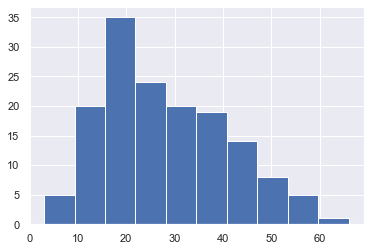

In [11]:
dataset["Class size "].hist()

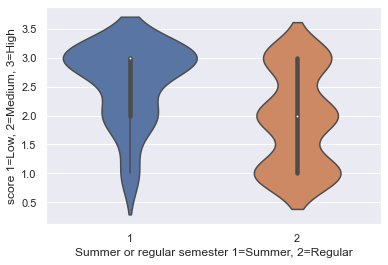

In [12]:
sns.violinplot(x='Summer or regular semester 1=Summer, 2=Regular',y='score 1=Low, 2=Medium, 3=High',data=dataset)
plt.show()

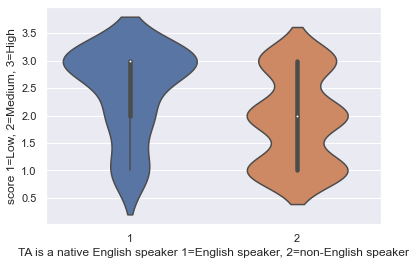

In [13]:
sns.violinplot(x='TA is a native English speaker 1=English speaker, 2=non-English speaker',y='score 1=Low, 2=Medium, 3=High',data=dataset)
plt.show()

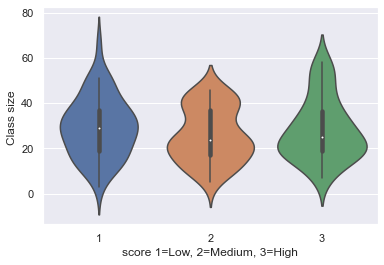

In [14]:
sns.violinplot(x='score 1=Low, 2=Medium, 3=High',y='Class size ',data=dataset)
plt.show()

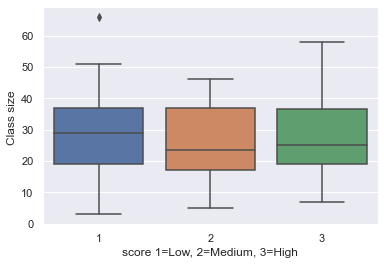

In [15]:
sns.boxplot(x='score 1=Low, 2=Medium, 3=High',y='Class size ',data=dataset)
plt.show()

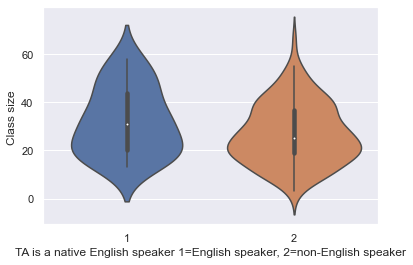

In [16]:
sns.violinplot(x='TA is a native English speaker 1=English speaker, 2=non-English speaker',y='Class size ',data=dataset)
plt.show()

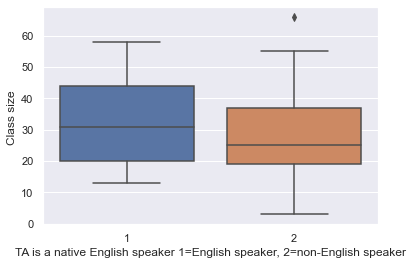

In [17]:
sns.boxplot(x='TA is a native English speaker 1=English speaker, 2=non-English speaker',y='Class size ',data=dataset)
plt.show()

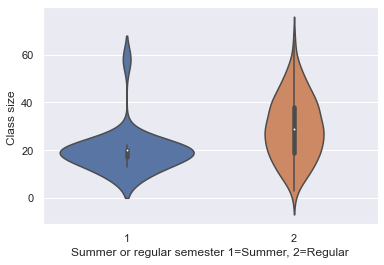

In [18]:
sns.violinplot(x='Summer or regular semester 1=Summer, 2=Regular',y='Class size ',data=dataset)
plt.show()

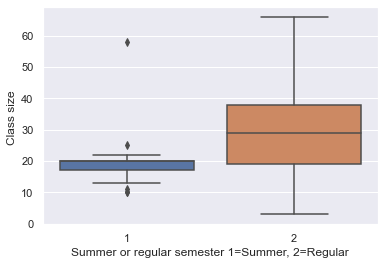

In [19]:
sns.boxplot(x='Summer or regular semester 1=Summer, 2=Regular',y='Class size ',data=dataset)
plt.show()

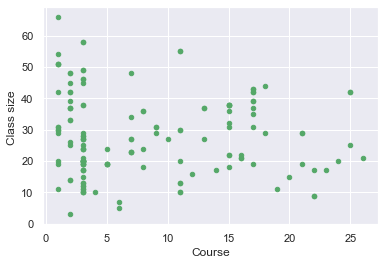

In [20]:
dataset.plot(kind='scatter',x='Course',y='Class size ', c= 'g')

plt.show()

In [21]:
nullData=dataset.append({'TA is a native English speaker 1=English speaker, 2=non-English speaker':1,
                         'Course instructor':0,'Course':np.nan,'Summer or regular semester 1=Summer, 2=Regular':np.nan
                         ,'Class size ':0,'score 1=Low, 2=Medium, 3=High':np.nan},ignore_index=True)


In [22]:
print('columns with missing values')
print(nullData.isnull().sum())
print('\n columns with zero values')
print((nullData[['TA is a native English speaker 1=English speaker, 2=non-English speaker', 'Course instructor'
                ,'Course', 'Summer or regular semester 1=Summer, 2=Regular'
                ,'Class size ','score 1=Low, 2=Medium, 3=High']]==0).sum())

columns with missing values
TA is a native English speaker 1=English speaker, 2=non-English speaker    0
Course instructor                                                          0
Course                                                                     1
Summer or regular semester 1=Summer, 2=Regular                             1
Class size                                                                 0
score 1=Low, 2=Medium, 3=High                                              1
dtype: int64

 columns with zero values
TA is a native English speaker 1=English speaker, 2=non-English speaker    0
Course instructor                                                          1
Course                                                                     0
Summer or regular semester 1=Summer, 2=Regular                             0
Class size                                                                 1
score 1=Low, 2=Medium, 3=High                                              0
dtype: i

In [23]:
nullData[['TA is a native English speaker 1=English speaker, 2=non-English speaker', 'Course instructor'
        ,'Course', 'Summer or regular semester 1=Summer, 2=Regular','Class size '
          ,'score 1=Low, 2=Medium, 3=High']]=nullData[['TA is a native English speaker 1=English speaker, 2=non-English speaker'
        , 'Course instructor','Course', 'Summer or regular semester 1=Summer, 2=Regular'
        ,'Class size ','score 1=Low, 2=Medium, 3=High']].replace(0,np.nan)
print("columns with missing values")
print(nullData.isnull().sum())

columns with missing values
TA is a native English speaker 1=English speaker, 2=non-English speaker    0
Course instructor                                                          1
Course                                                                     1
Summer or regular semester 1=Summer, 2=Regular                             1
Class size                                                                 1
score 1=Low, 2=Medium, 3=High                                              1
dtype: int64


In [24]:
nullData.fillna(nullData.mean(), inplace=True)
print(nullData.isnull().sum())

TA is a native English speaker 1=English speaker, 2=non-English speaker    0
Course instructor                                                          0
Course                                                                     0
Summer or regular semester 1=Summer, 2=Regular                             0
Class size                                                                 0
score 1=Low, 2=Medium, 3=High                                              0
dtype: int64


In [32]:
x=dataset.iloc[:,[0,1,2,3]].values

In [33]:
Kmeans5 = KMeans(n_clusters=5)
y_Kmeans5 = Kmeans5.fit_predict(x)
print(y_Kmeans5)
Kmeans5.cluster_centers_

[2 0 2 0 1 2 0 0 2 0 4 0 4 1 1 1 1 2 0 4 2 2 1 1 3 1 0 3 2 2 0 2 0 0 0 3 1
 0 3 2 0 2 0 1 2 0 0 2 0 4 0 4 1 1 1 1 2 0 4 2 2 1 1 3 1 0 3 2 2 0 2 0 0 0
 3 1 0 3 2 0 4 0 0 4 2 1 2 2 2 4 3 0 4 3 1 1 3 3 0 0 1 2 2 1 2 2 2 2 2 0 0
 1 3 0 0 0 0 2 1 0 2 3 0 0 3 0 0 2 2 3 3 3 4 4 4 0 0 2 1 0 2 3 4 0 2 2 0 0
 2 2 1]


array([[ 1.83673469, 10.28571429,  2.85714286,  1.79591837],
       [ 1.96296296,  4.85185185, 13.22222222,  1.88888889],
       [ 1.66666667, 22.0952381 ,  3.30952381,  1.76190476],
       [ 1.68421053, 15.68421053, 14.31578947,  2.        ],
       [ 2.        , 14.21428571, 22.57142857,  2.        ]])

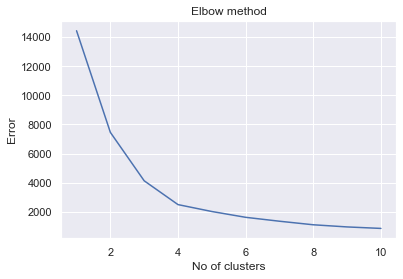

In [34]:
Error=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()


In [41]:
le = LabelEncoder()
le.fit(dataset['score 1=Low, 2=Medium, 3=High'].values)
y = le.transform(dataset['score 1=Low, 2=Medium, 3=High'].values)
x = dataset.drop(['score 1=Low, 2=Medium, 3=High'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.34,
                                                   stratify= y,
                                                   random_state= seed)

In [42]:
tree = DecisionTreeClassifier(criterion = 'gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             max_depth=None,
                             random_state=seed)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('DecsionTreeClassifire accuracy score: {}'.format(accuracy*100))

DecsionTreeClassifire accuracy score: 38.46153846153847


Confusion matrox is 
[[5 8 4]
 [7 6 4]
 [3 6 9]]


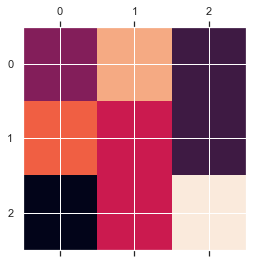

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion matrox is ')
print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.matshow(cm)
plt.show()

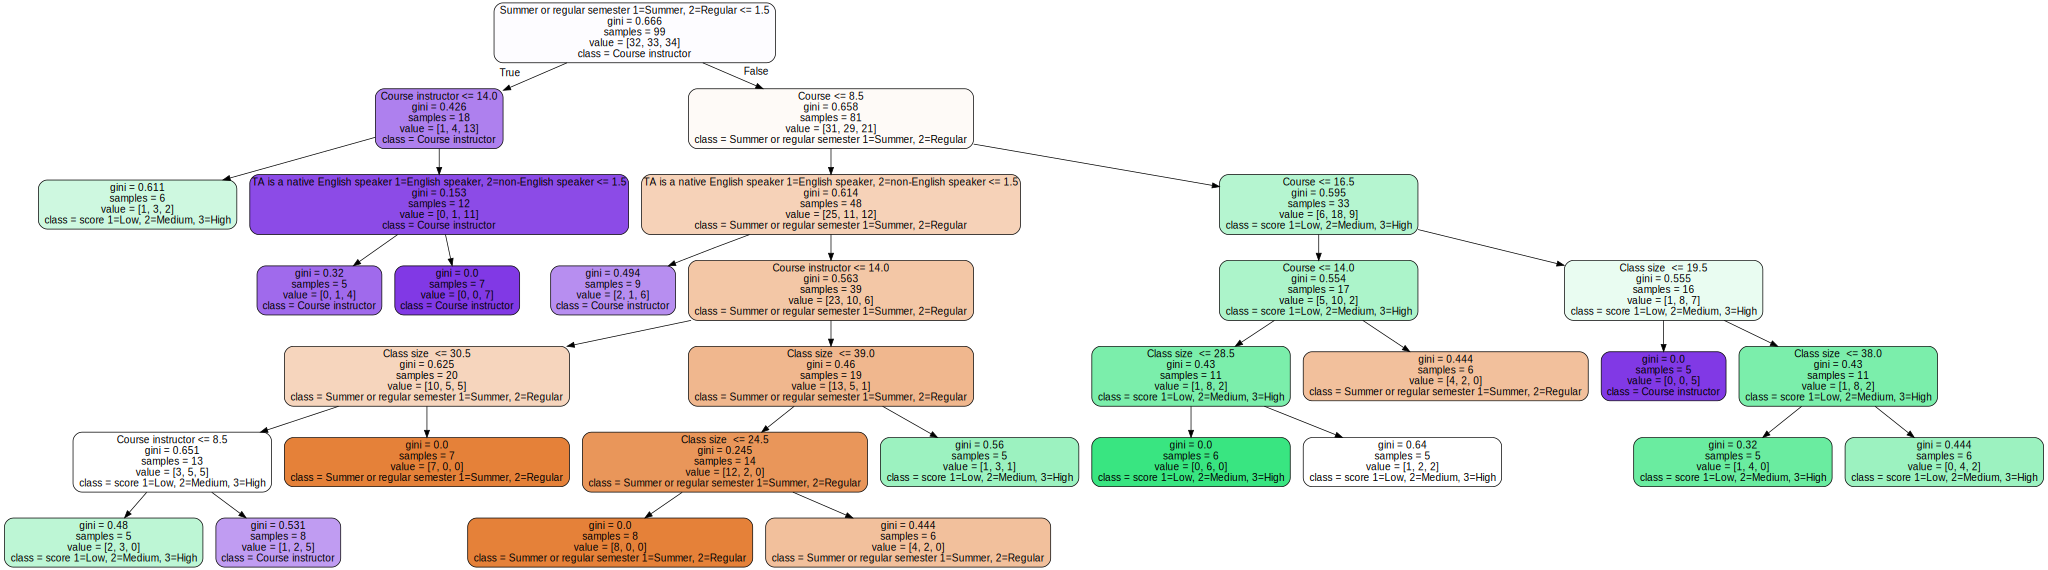

In [47]:
import os 
os.environ["Path"]+=os.pathsep+ r'C:\Program Files\Graphviz\bin'
def plot_tree(tree, dataframe, label_col, label_encoder,plot_title):
    label_names=['Summer or regular semester 1=Summer, 2=Regular','score 1=Low, 2=Medium, 3=High','Course instructor']
    graph_data= export_graphviz(tree,
                               feature_names=dataframe.drop(label_col,axis=1).columns,
                               class_names=label_names,
                               filled=True,
                               rounded=True,
                               out_file=None)
    graph= graphviz.Source(graph_data)
    graph.render(plot_title,view=True)
    return graph
tree_graph= plot_tree(tree,dataset,'score 1=Low, 2=Medium, 3=High',le,'tae')
tree_graph